In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

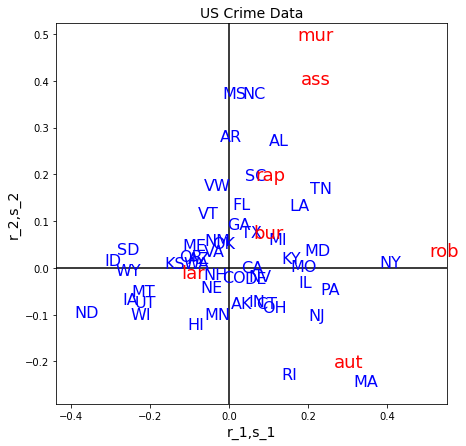

In [2]:
x1 = pd.read_csv("uscrime.dat", sep = "\s+", header=None)
x = x1.iloc[:, 2:9]
a = x.sum(axis = 1)
b = x.sum(axis = 0)
e = np.reshape(np.array(a), (len(a), -1)) @ (np.reshape(np.array(b), (-1, len(b)))/sum(a))

# chi-matrix
cc = (x - e)/np.sqrt(e)

g, l, d = np.linalg.svd(cc, full_matrices = False)
ll = l**2 #eigenvalues
aux = np.cumsum(ll)/sum(ll)
perc = np.vstack((ll, aux))
r1 = np.multiply(np.tile(l, (g.shape[0], 1)), g)
r = r1/np.tile(np.reshape(np.array(np.sqrt(a)), (len(a), -1)), (1, g.shape[1]))
s1 = np.multiply(np.tile(l, (d.shape[0], 1)), d.T)
s = s1/np.tile(np.reshape(np.array(np.sqrt(b)), (len(b), -1)), (1, d.shape[1]))

# labels for crimes
crime = ["mur", "rap", "rob", "ass", "bur", "lar", "aut"]

# labels for regions
state = ["ME", "NH", "VT", "MA", "RI", "CT", "NY", "NJ", "PA", "OH", "IN", "IL", 
         "MI", "WI", "MN", "IA", "MO", "ND", "SD", "NE", "KS", "DE", "MD", "VA", 
         "VW", "NC", "SC", "GA", "FL", "KY", "TN", "AL", "MS", "AR", "LA", "OK", 
         "TX", "MT", "ID", "WY", "CO", "NM", "AZ", "UT", "NV", "WA", "OR", "CA", 
         "AK", "HI"]

fig, ax = plt.subplots(figsize = (7, 7))
ax.scatter(r[:, 0], r[:, 1], c = "w")
ax.scatter(s[:, 0], s[:, 1], c = "w")

for i in range(len(state)):
    ax.text(r[i, 0], r[i, 1], state[i], c = "b", fontsize = 16)
    
for i in range(len(crime)):
    ax.text(s[i, 0], s[i, 1], crime[i], c = "r", fontsize = 18)
    
ax.axvline(0, c = "k")
ax.axhline(0, c = "k")

plt.title("US Crime Data", fontsize = 14)
ax.set_xlabel("r_1,s_1", fontsize = 14)
ax.set_ylabel("r_2,s_2", fontsize = 14)

plt.show()